## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Load file
df = pd.read_csv('/Users/sunwoonam/Desktop/Griffith/2023_T1/7130ICT_Data Analytics/Lab/Lab4/opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [8]:
# Description

summary_stats = df.describe()
summary_stats = summary_stats.rename(index={'count': 'count'})

print(summary_stats)


       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [12]:
# Transform the dates into datetime format
df['Date'] = pd.to_datetime(df['Date'])
type(df.index)

pandas.core.indexes.range.RangeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

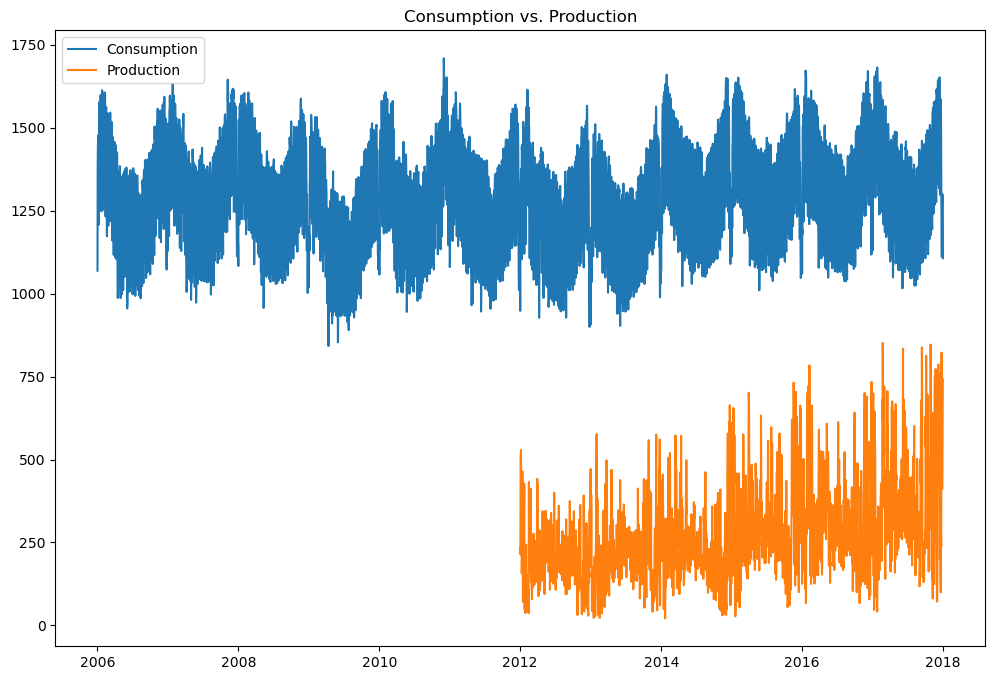

In [16]:
plt.figure(figsize=(12,8))

plt.plot(df['Date'], df['Consumption'], label='Consumption')
plt.plot(df['Date'], df['Wind+Solar'], label='Production')

plt.title('Consumption vs. Production')

plt.legend()
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

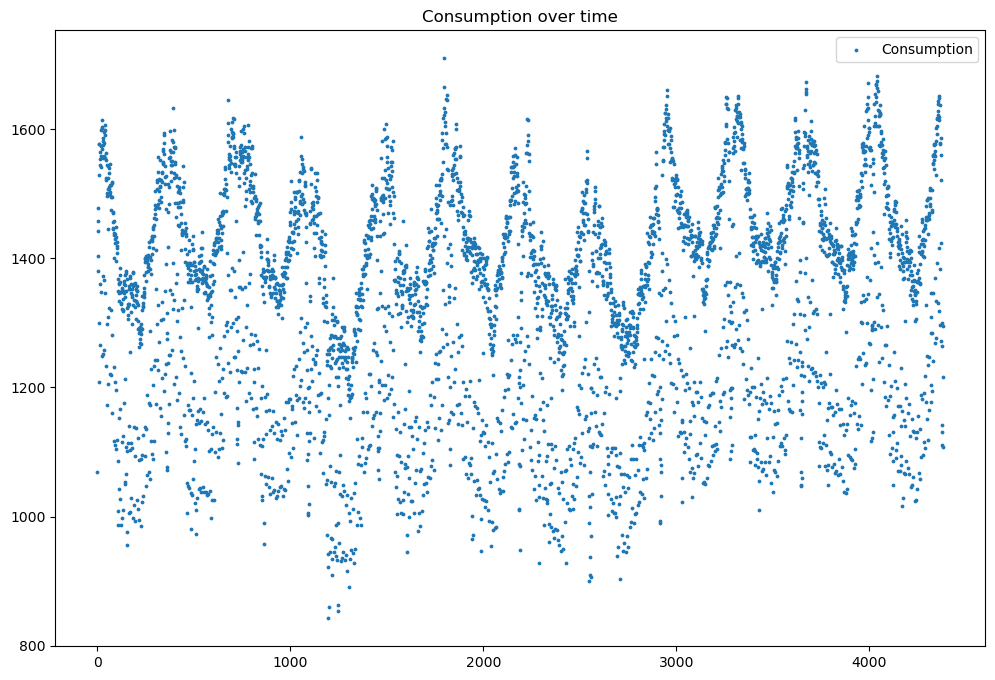

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(df.index, df['Consumption'], s=3)
plt.legend(['Consumption', 'Production'])
plt.title('Consumption over time')
plt.show()

And plot the production over time :

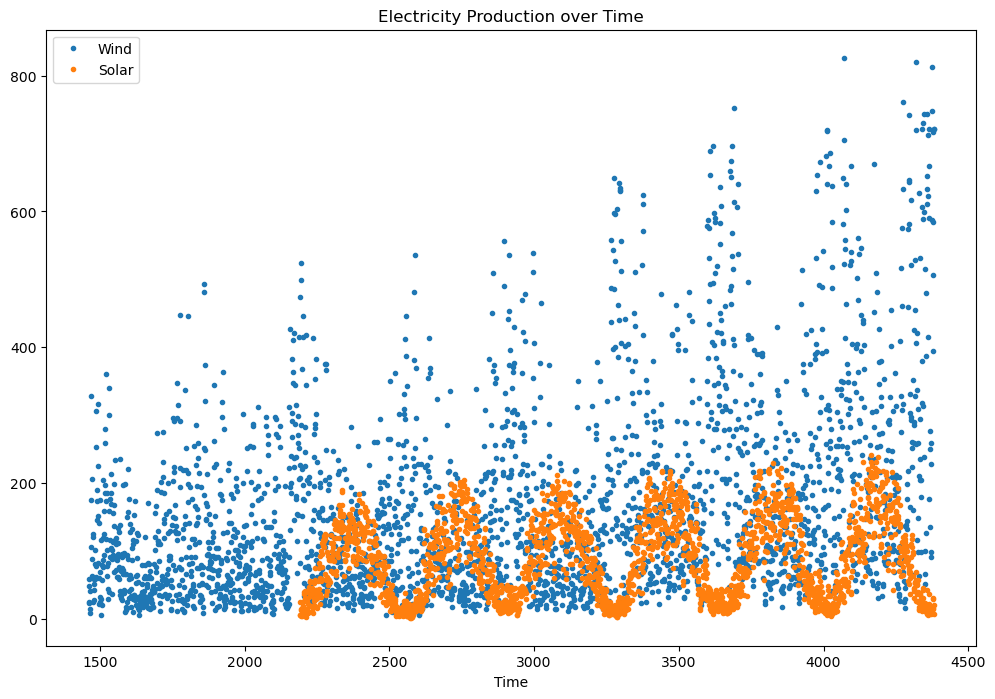

In [30]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Wind'], '.', label='Wind')
plt.plot(df.index, df['Solar'], '.', label='Solar')
plt.legend(loc='upper left')
plt.title('Solar Production over time')
plt.show()



What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

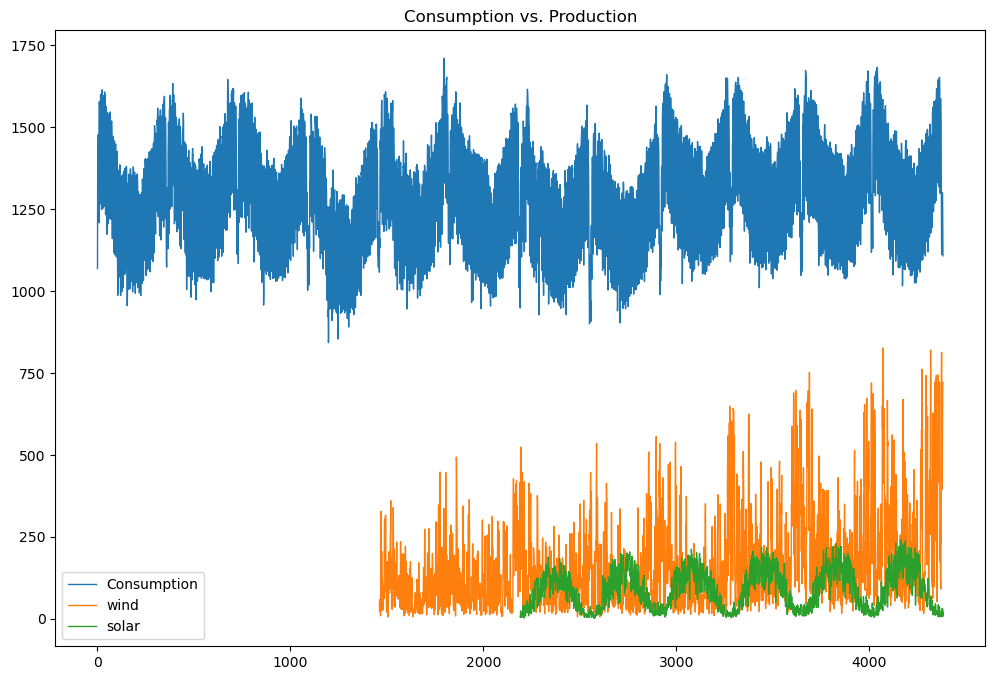

In [27]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Consumption'], linewidth=1, label='Consumption')
plt.plot(df.index, df['Wind'], linewidth=1, label='wind')
plt.plot(df.index, df['Solar'], linewidth=1, label='solar')
plt.legend()
plt.title('Consumption vs. Production')
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

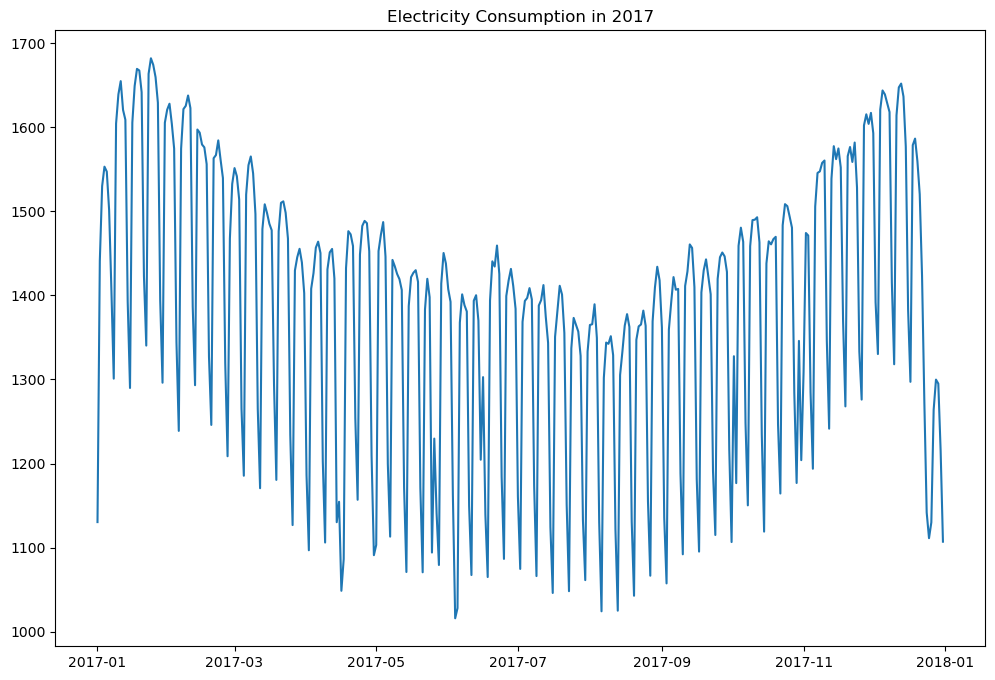

In [50]:
# Plot over the year
plt.figure(figsize=(12,8))
df_2017 = df[df['Date'].dt.year == 2017]
plt.plot(df_2017['Date'], df_2017['Consumption'])
plt.title('Electricity Consumption in 2017')
plt.show()



It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

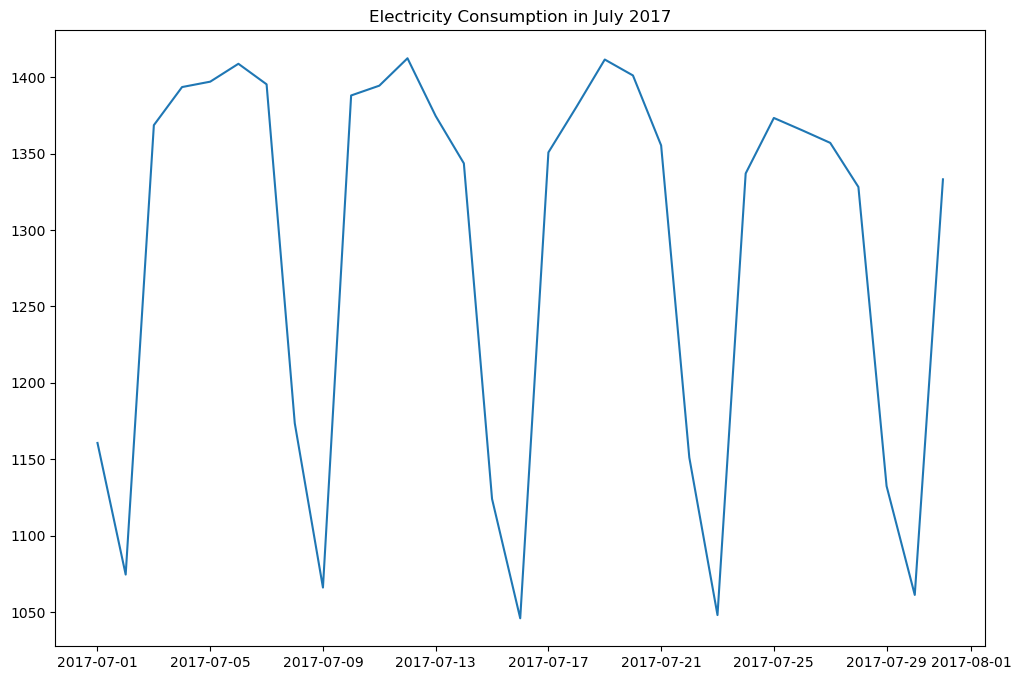

In [52]:
# Plot over a month
plt.figure(figsize=(12,8))
df_july_2017 = df[(df['Date'].dt.month == 7) & (df['Date'].dt.year == 2017)]
plt.plot(df_july_2017['Date'], df_july_2017['Consumption'])
plt.title('Electricity Consumption in July 2017')
plt.show()


When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

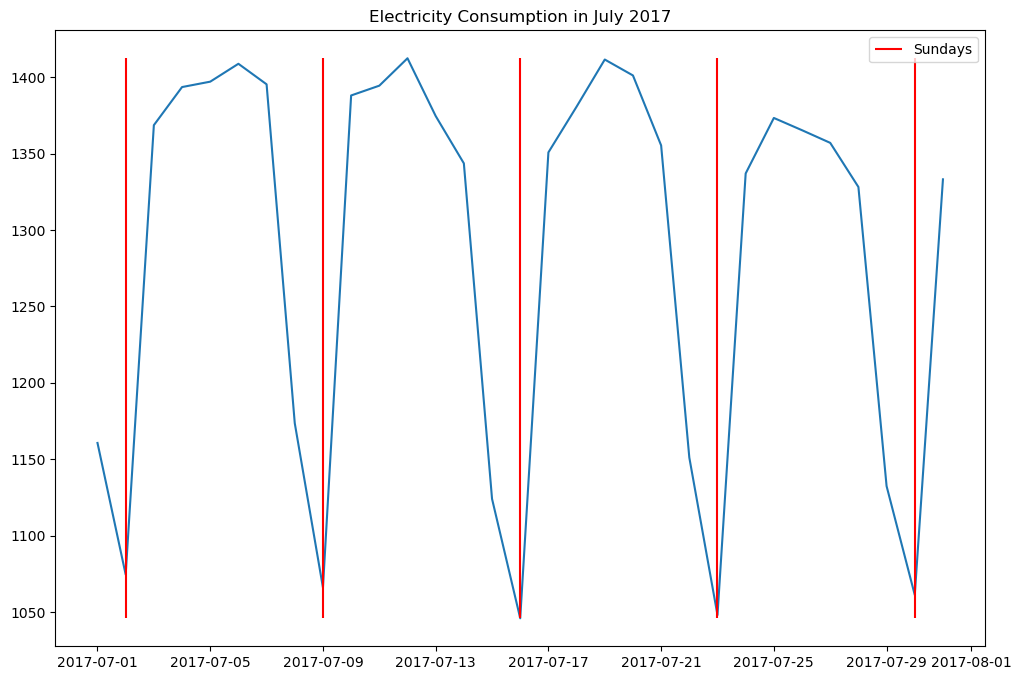

In [56]:
#Plot on Sundays
plt.figure(figsize=(12,8))
df_july_2017 = df[(df['Date'].dt.month == 7) & (df['Date'].dt.year == 2017)]
plt.plot(df_july_2017['Date'], df_july_2017['Consumption'])
sundays = df_july_2017[df_july_2017['Date'].dt.dayofweek == 6]
plt.vlines(sundays['Date'], ymin=df_july_2017['Consumption'].min(), ymax=df_july_2017['Consumption'].max(), color='red', label='Sundays')
plt.title('Electricity Consumption in July 2017')
plt.legend()
plt.show()


### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [57]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = df_2['Date'].dt.year
df_2['month'] = df_2['Date'].dt.strftime('%b')
df_2.drop('index', axis=1, inplace=True)
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


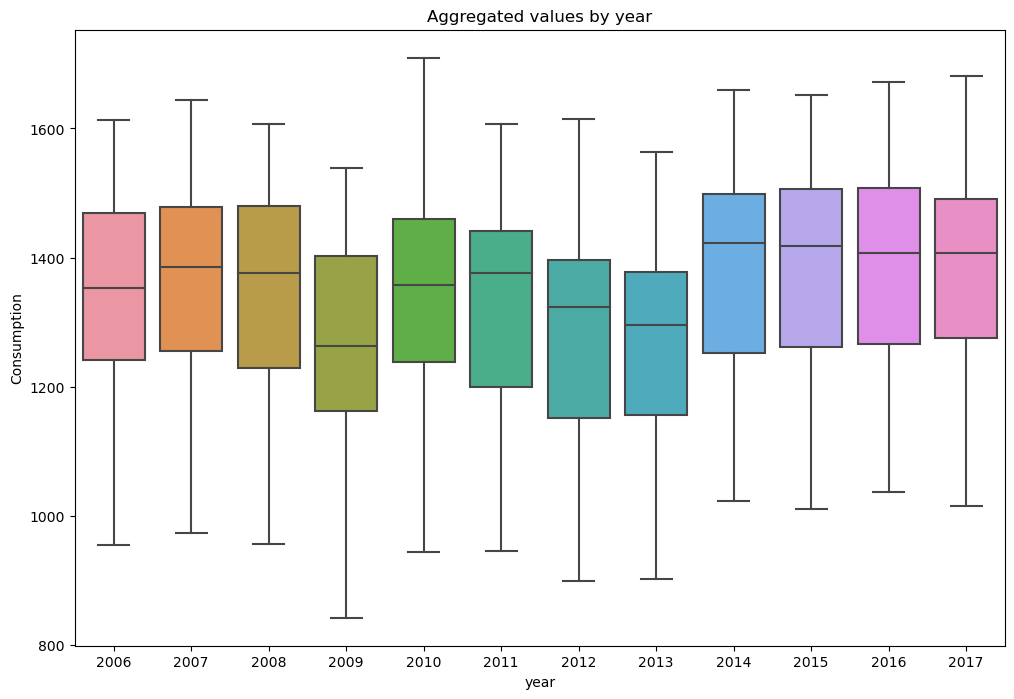

In [58]:
# Boxplot year
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='Consumption', data=df_2)
plt.title('Aggregated values by year')
plt.show()


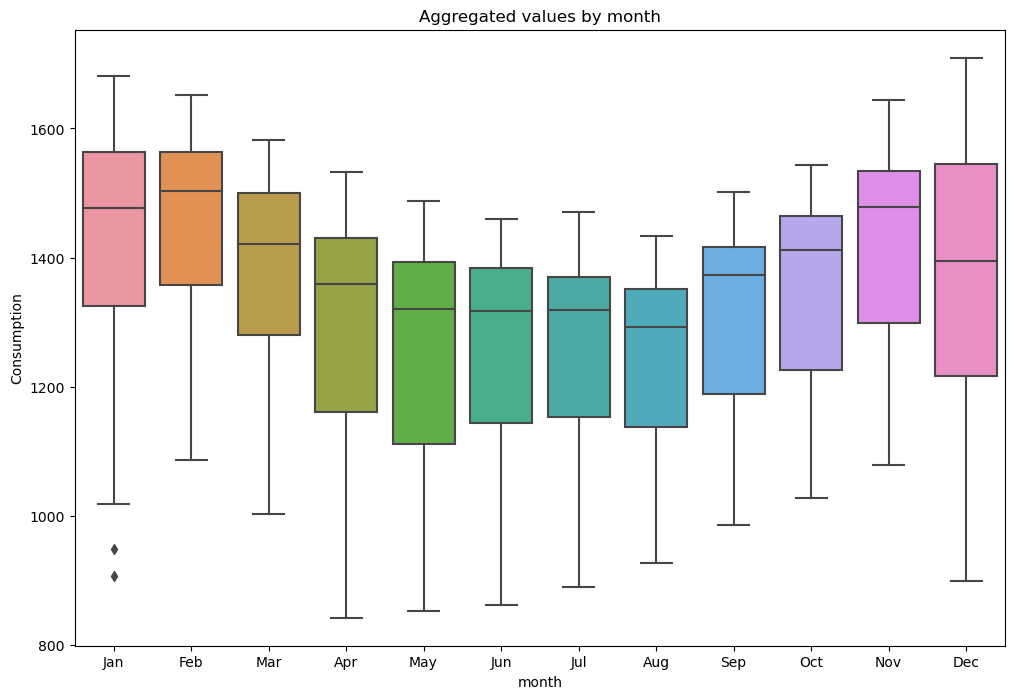

In [59]:
# Boxplot month
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='Consumption', data=df_2)
plt.title('Aggregated values by month')
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

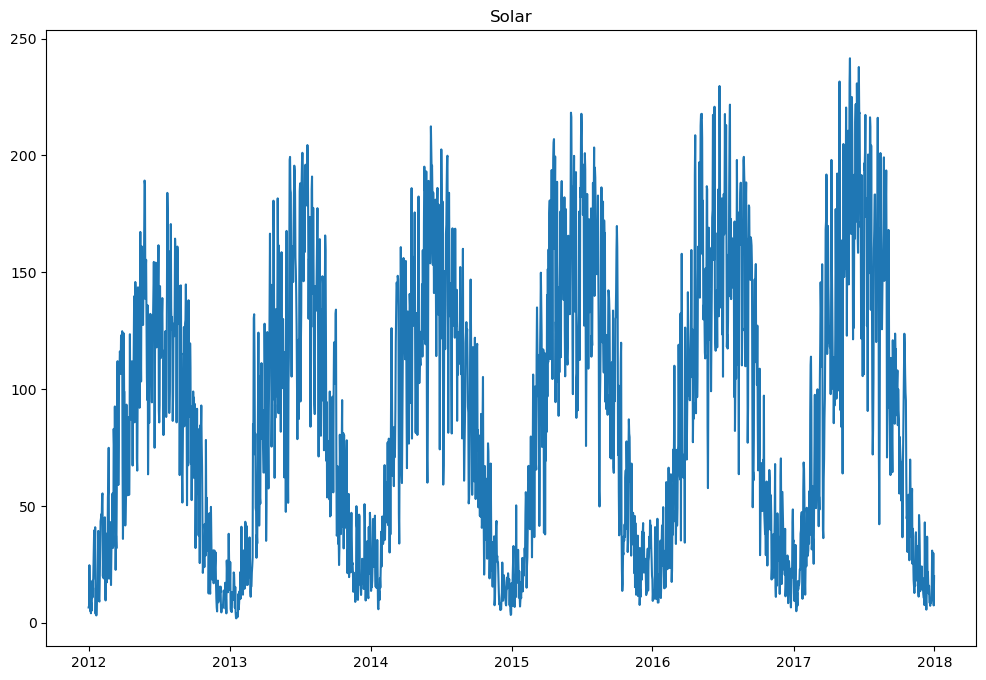

In [64]:
# Plot Solar

plt.figure(figsize=(12,8))
plt.plot(df['Date'], df['Solar'])
plt.title('Solar')
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [67]:
# Compute correlation between consumption and overall production
corr = df[['Consumption', 'Wind+Solar']].corr().loc['Consumption', 'Wind+Solar']
print(f"Correlation between consumption and overall production: {corr}")


Correlation between consumption and overall production: 0.02966071033066066


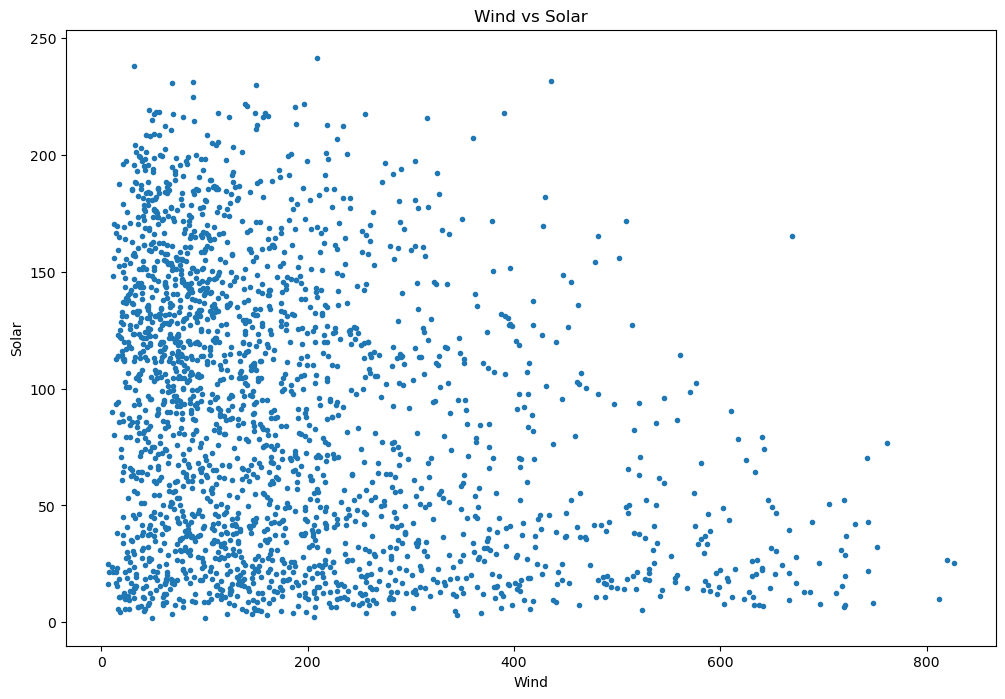

In [72]:
# Correlation between solar production and wind production
plt.figure(figsize=(12,8))
plt.plot(df['Wind'], df['Solar'], '.')
plt.title('Wind vs Solar')
plt.xlabel('Wind')
plt.ylabel('Solar')
plt.show()


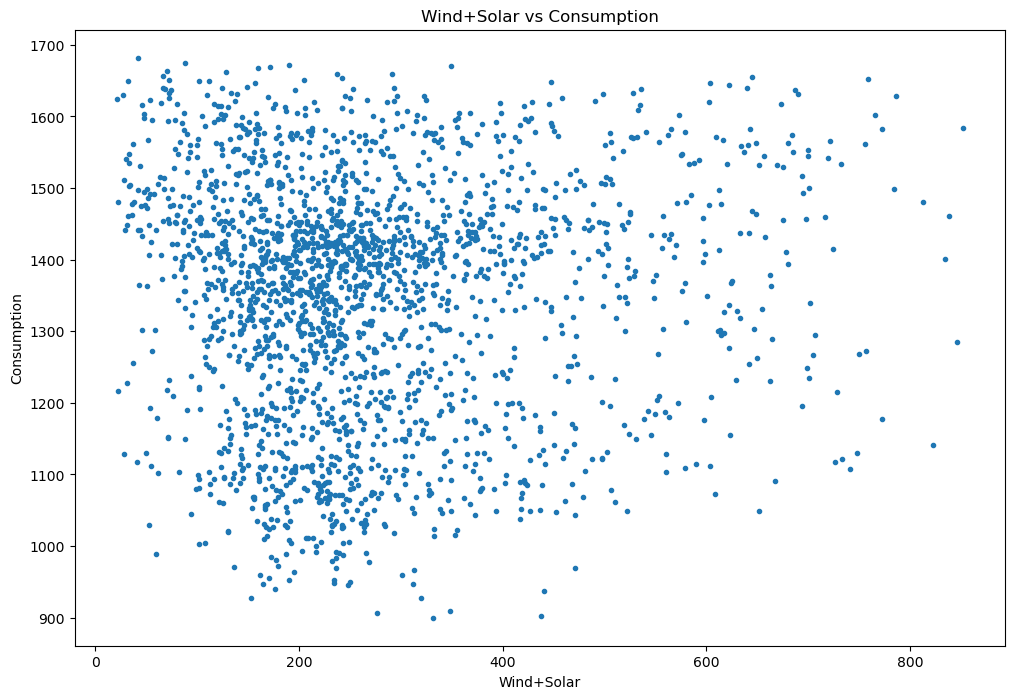

In [73]:
# Correlation between solar production and wind consumption
plt.figure(figsize=(12,8))
plt.plot(df['Wind+Solar'], df['Consumption'], '.')
plt.title('Wind+Solar vs Consumption')
plt.xlabel('Wind+Solar')
plt.ylabel('Consumption')
plt.show()

In [74]:
# Correlation between consumption and wind production
corr_wind = df['Wind'].corr(df['Consumption'])
print(corr_wind)


0.137250475185709


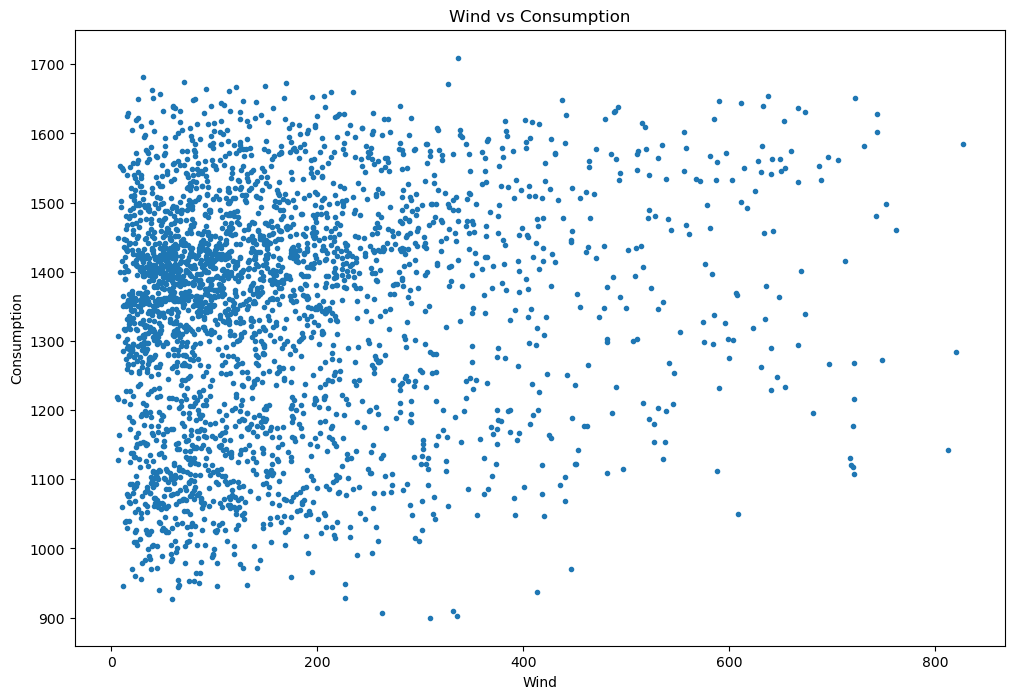

In [75]:
# Plot wind vs consumption
plt.figure(figsize=(12,8))
plt.plot(df['Wind'], df['Consumption'], '.')
plt.title('Wind vs Consumption')
plt.xlabel('Wind')
plt.ylabel('Consumption')
plt.show()

In [76]:
corr_solar = df['Solar'].corr(df['Consumption'])
print(corr_solar)


-0.278117912248844


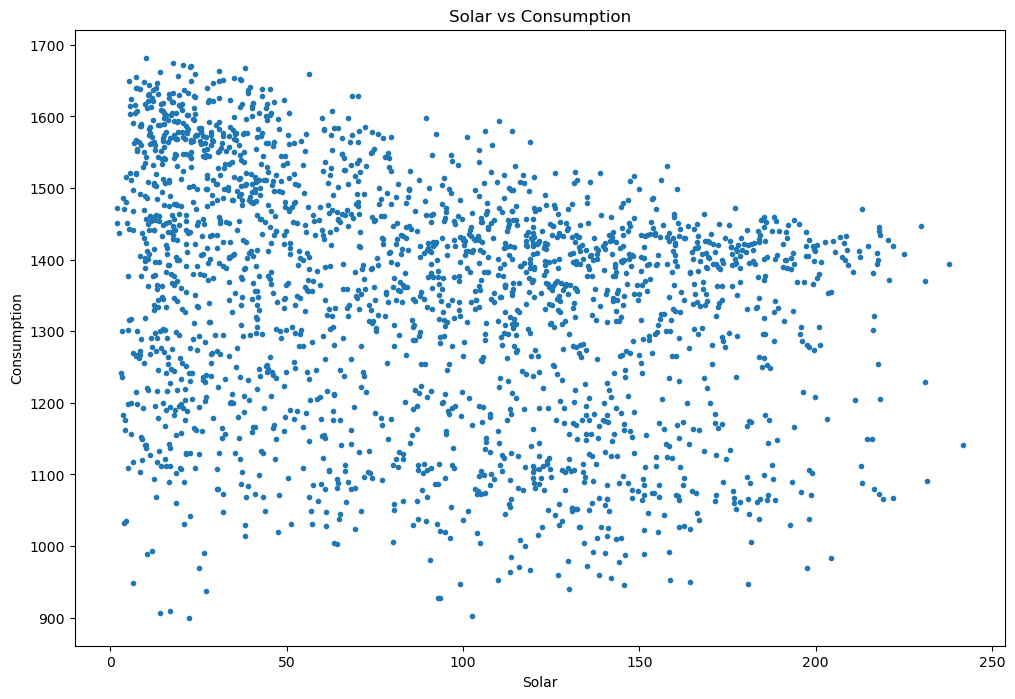

In [77]:
# Plot solar vs consumption
plt.figure(figsize=(12,8))
plt.plot(df['Solar'], df['Consumption'], '.')
plt.title('Solar vs Consumption')
plt.xlabel('Solar')
plt.ylabel('Consumption')
plt.show()